In [7]:
import torch

from torchfem.io import import_mesh


## A simple tensile specimen

In [8]:
# Material model (plane stress)
E = 72000.0
nu = 0.2
C = (E / ((1.0 + nu) * (1.0 - 2.0 * nu))) * torch.tensor(
    [[1.0 - nu, nu, 0.0], [nu, 1.0 - nu, 0.0], [0.0, 0.0, 0.5 - nu]]
)

# Import mesh
specimen = import_mesh("../meshes/tensile.vtu", C=C)

# Fixed end BCs
specimen.constraints[specimen.nodes[:, 0] < 0.1, 0] = True
specimen.constraints[(specimen.nodes[:, 0] < 0.1) & (torch.abs(specimen.nodes[:, 1]) < 0.1), 1] = True

# Loaded end BCs
force = 1000.0
specimen.forces[specimen.nodes[:, 0] >= 149.9, 0] = force
specimen.forces[specimen.nodes[:, 1] >= 5.9, 0] *= 0.5
specimen.forces[specimen.nodes[:, 1] <= -5.9, 0] *= 0.5

In [9]:
u, f = specimen.solve()

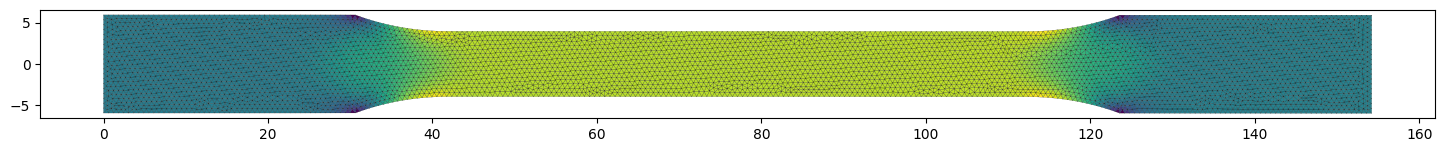

In [10]:
# Stress
sigma = specimen.compute_stress(u)
mises = torch.sqrt(sigma[:,0]**2 + sigma[:,1]**2 - sigma[:,0]*sigma[:,1])
specimen.plot(u, axes=True, bcs=False, element_property=mises, linewidth=0.1, figsize=(18,3))